# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 10</span>

### Exercise 10.1

Choose **ONLY ONE** of the two following possibilities:

1. Parallelize with MPI libraries your Genetic Algorithm code in order to solve the TSP by performing a *Genetic Search* with (up to) 11 **parallel GA searches of the optimal path**:
each node should perform an independent GA search, the so-called *Continent*, **but** every $N_{migr}$ generations the *Continents* should exchange their best individuals randomly.

2. Starting from your Genetic Algorithm code implement a **Parallel Tempering algorithm** (Simulated Annealing with many temperatures). Parallelize with MPI libraries your algorithm in order to solve the TSP where each computing node, up to 11, is characterized by a different temperature or a limited set of temperatures (if you need more than 11 temperatures). Use your genetic operators (except crossover) as trial moves for the Metropolis algorithm and **add a trial move that proposes an exchange of paths among adjacent temperatures (nodes)** (see lecture 8 for the acceptance formula). The candidate solution of the TSP will appear on the node with the lower temperature.

### Exercise 10.2

Apply your parallel code to the TSP problem for 110 italian "capoluoghi di provincia" longitude and latitude coordinates in the *cap_prov_ita.dat* file.

If your choice in Exercise 10.1 is option 1, do you improve with respect using the same number of computing cores but with **independent GA searches** ?

If your choice in Exercise 10.1 is option 2, by using a number of temperatures equal to the number of individuals in your **non-parallel Genetic Algorithm code**, do you "improve" with respect to it?

## SUBMISSION

### EX - 10.1

In [92]:
import matplotlib.pyplot as plt
import numpy as np
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.animation as animation
from IPython.display import HTML
from PIL import Image
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib.offsetbox import AnchoredText

In [24]:
best_pos_circle=np.loadtxt("./OUTPUT/CIRCLE/PATHS/path_150.dat")
loss=np.loadtxt("./OUTPUT/CIRCLE/best_loss.dat")
half_loss=np.loadtxt("./OUTPUT/CIRCLE/half_loss.dat")

best_pos_square=np.loadtxt("./OUTPUT/SQUARE/PATHS/path_150.dat")
loss_square=np.loadtxt("./OUTPUT/SQUARE/best_loss.dat")
half_loss_square=np.loadtxt("./OUTPUT/SQUARE/half_loss.dat")

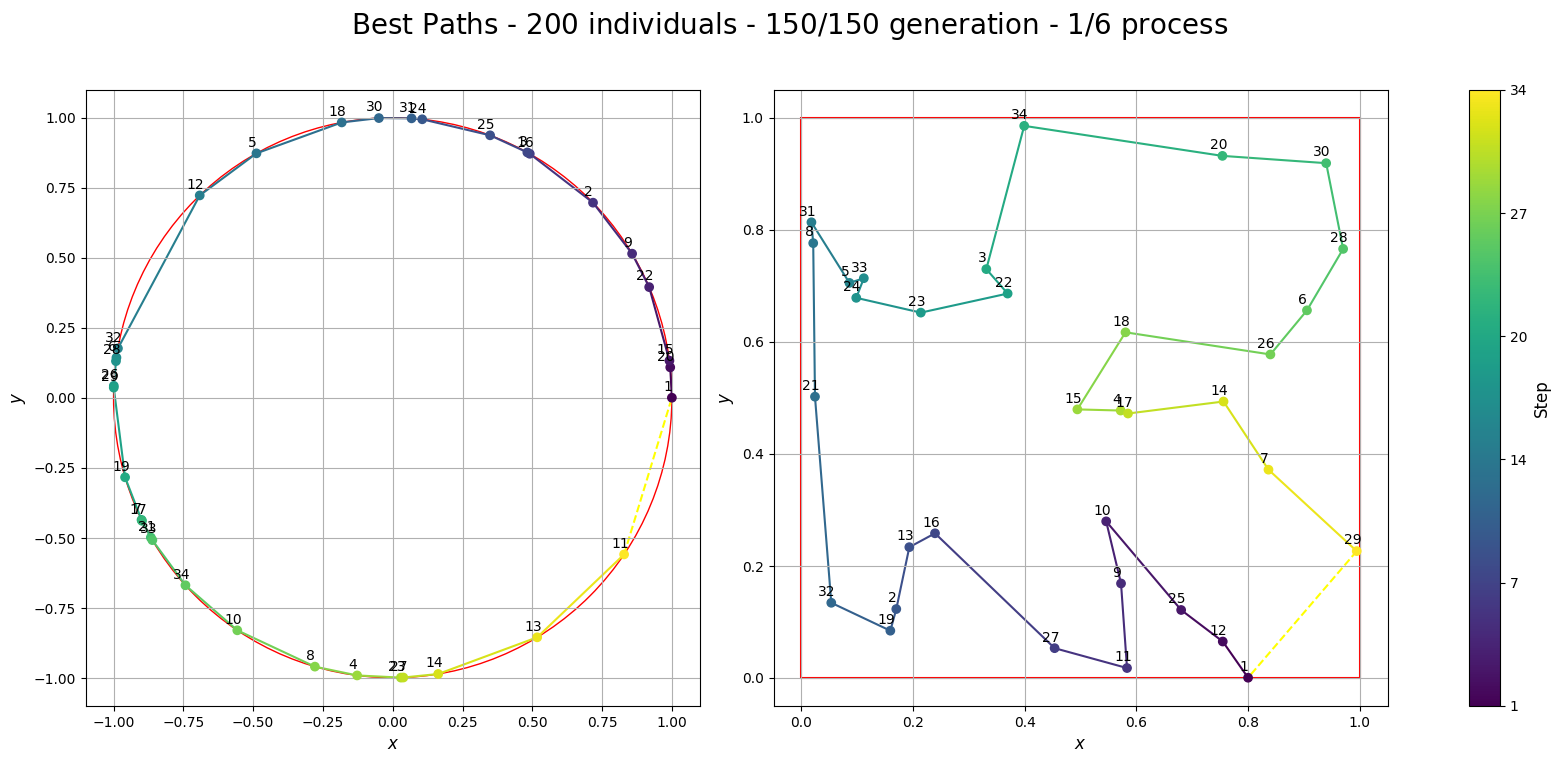

In [55]:
fig, axs = plt.subplots(1, 2, figsize=(21,8), gridspec_kw={'wspace':0.12})

circle = patches.Circle((0, 0), radius=1, edgecolor='r', facecolor='none')
axs[0].add_patch(circle)
steps = np.arange(len(best_pos_circle))
cmap = plt.get_cmap('viridis')
colors = cmap(steps / steps.max())
sc=axs[0].scatter(best_pos_circle[:,1], best_pos_circle[:,2], color=colors, zorder=2)

for i, (x, y) in enumerate(zip(best_pos_circle[:,1], best_pos_circle[:,2])):
    axs[0].plot( best_pos_circle[i:i+2,1], best_pos_circle[i:i+2,2], color=colors[i], zorder=1)
    axs[0].annotate(f'{int(best_pos_circle[i,0])}', (x, y), color='black',textcoords="offset points", xytext=(-3,5), ha='center')

axs[0].plot( [best_pos_circle[len(best_pos_circle)-1,1],best_pos_circle[0,1]], [best_pos_circle[len(best_pos_circle)-1,2],best_pos_circle[0,2]], color='yellow', linestyle='--',zorder=1)
axs[0].set_xlabel(r'$x$',fontsize=12)
axs[0].set_ylabel(r'$y$',fontsize=12)
axs[0].grid(True)

square = patches.Rectangle((0, 0), 1, 1, linewidth=1.5, edgecolor='r', facecolor='none')
axs[1].add_patch(square)
sc=axs[1].scatter(best_pos_square[:,1], best_pos_square[:,2], color=colors, zorder=2)

for i, (x, y) in enumerate(zip(best_pos_square[:,1], best_pos_square[:,2])):
    axs[1].plot( best_pos_square[i:i+2,1], best_pos_square[i:i+2,2], color=colors[i], zorder=1)
    axs[1].annotate(f'{int(best_pos_square[i,0])}', (x, y), color='black',textcoords="offset points", xytext=(-3,5), ha='center')

axs[1].plot( [best_pos_square[len(best_pos_square)-1,1],best_pos_square[0,1]], [best_pos_square[len(best_pos_square)-1,2],best_pos_square[0,2]], color='yellow', linestyle='--',zorder=1)
axs[1].set_xlabel(r'$x$',fontsize=12)
axs[1].set_ylabel(r'$y$',fontsize=12)
axs[1].grid(True)


sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=1, vmax=steps.max()+1))
sm.set_array([])
cbar = fig.colorbar(sm, ax=axs, orientation='vertical')
cbar.set_label('Step', fontsize=12)
ticks = np.linspace(1, steps.max()+1, num=6)
cbar.set_ticks(ticks)
cbar.set_ticklabels([f'{int(tick)}' for tick in ticks]) 

plt.suptitle(r'Best Paths - $200$ individuals - $150/150$ generation - $1/6$ process',x=0.46,fontsize=20)
plt.show()

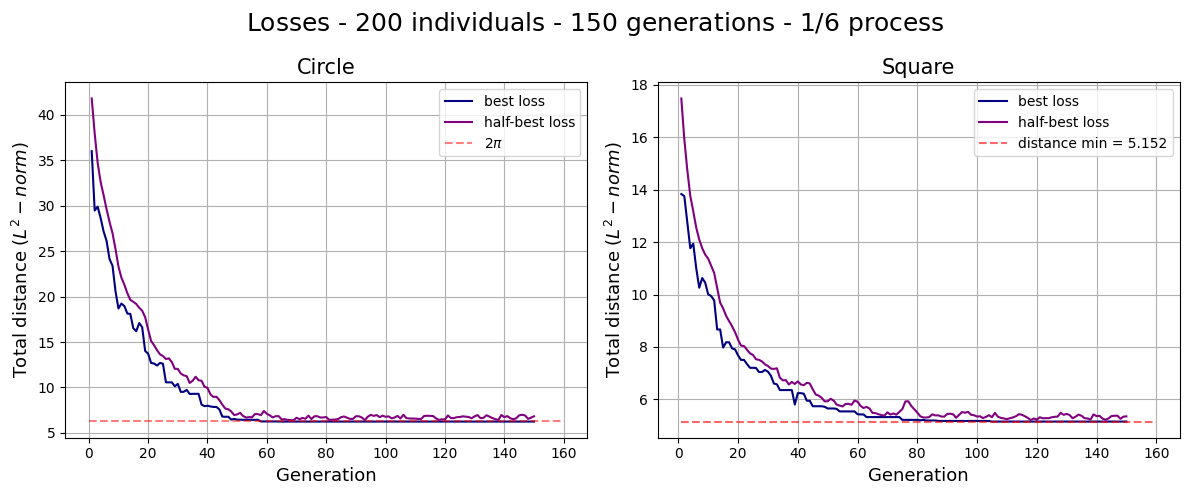

In [49]:
fig=plt.figure(figsize=(12,5))

ax1=fig.add_subplot(1,2,1)
ax1.plot(loss[:,0],loss[:,1],color='navy',label=r'best loss')
ax1.plot(half_loss[:,0],half_loss[:,1],color='purple',label=r'half-best loss')
ax1.hlines(2*np.pi,xmin=0,xmax=160,color='r',linestyles='--',alpha=0.5,label=r'$2\pi$')
ax1.set_xlabel(r'Generation',fontsize=13)
ax1.set_ylabel(r'Total distance ($L^2-norm$)',fontsize=13)
ax1.set_title(r'Circle',fontsize=15)
ax1.legend()
ax1.grid(True)

ax2=fig.add_subplot(1,2,2)
ax2.plot(loss_square[:,0],loss_square[:,1],color='navy',label=r'best loss')
ax2.plot(half_loss_square[:,0],half_loss_square[:,1],color='purple',label=r'half-best loss')
ax2.hlines(loss_square[-1,1],xmin=loss_square[0,0],xmax=(loss_square[-1,0]+10),color='r',alpha=0.6,linestyles='--',label=f'distance min = {round(loss_square[-1,1],3)}')
ax2.set_xlabel(r'Generation',fontsize=13)
ax2.set_ylabel(r'Total distance ($L^2-norm$)',fontsize=13)
ax2.set_title(r'Square',fontsize=15)
ax2.legend()
ax2.grid(True)

plt.suptitle(r'Losses - $200$ individuals - $150$ generations - $1/6$ process',fontsize=18)
plt.tight_layout()
plt.show()

In [43]:
# gif creation

#PATHS
circle_path_dir = 'OUTPUT/CIRCLE/PATHS'
square_path_dir = 'OUTPUT/SQUARE/PATHS'
n_generations = 150

#LOADING PATHS
def load_generation_data(generation):
    circle_file = os.path.join(circle_path_dir, f'path_{generation}.dat')
    square_file = os.path.join(square_path_dir, f'path_{generation}.dat')

    pos_circle = np.loadtxt(circle_file)
    pos_square = np.loadtxt(square_file)
    
    return pos_circle, pos_square

In [52]:
def gif(gens):
     files=[]
     for i in gens:
        file = 'OUTPUT/IMAGES/best_path_' + str(i) + '.png'
        files.append(file) 
        fig,axs=plt.subplots(1, 2, figsize=(21,8), gridspec_kw={'wspace':0.12})
        circle = patches.Circle((0, 0), radius=1, edgecolor='r', facecolor='none')
        axs[0].add_patch(circle)
        square = patches.Rectangle((0, 0), 1, 1, linewidth=1.5, edgecolor='r', facecolor='none')
        axs[1].add_patch(square)
        cmap = plt.get_cmap('viridis')
        axs[0].add_patch(patches.Circle((0, 0), radius=1, edgecolor='r', facecolor='none'))
        axs[1].add_patch(patches.Rectangle((0, 0), 1, 1, linewidth=1.5, edgecolor='r', facecolor='none'))

        pos_circle, pos_square = load_generation_data(str(i + 1) )

        steps = np.arange(len(pos_circle))
        colors = cmap(steps / steps.max())

        axs[0].scatter(pos_circle[:,1], pos_circle[:,2], color=colors, zorder=2)
        for j in range(len(pos_circle) - 1):
            axs[0].plot(pos_circle[j:j+2,1], pos_circle[j:j+2,2], color=colors[j], zorder=1)
            axs[0].annotate(f'{int(pos_circle[j,0])}', (pos_circle[j,1], pos_circle[j,2]), color='black', 
                            textcoords="offset points", xytext=(-3,5), ha='center')

        axs[0].plot([pos_circle[-1,1], pos_circle[0,1]], [pos_circle[-1,2], pos_circle[0,2]], 
                    color='yellow', linestyle='--', zorder=1)

        axs[1].scatter(pos_square[:,1], pos_square[:,2], color=colors, zorder=2)
        for j in range(len(pos_square) - 1):
            axs[1].plot(pos_square[j:j+2,1], pos_square[j:j+2,2], color=colors[j], zorder=1)
            axs[1].annotate(f'{int(pos_square[j,0])}', (pos_square[j,1], pos_square[j,2]), color='black', 
                            textcoords="offset points", xytext=(-3,5), ha='center')

        axs[1].plot([pos_square[-1,1], pos_square[0,1]], [pos_square[-1,2], pos_square[0,2]], 
                    color='yellow', linestyle='--', zorder=1)

        axs[0].set_xlabel(r'$x$', fontsize=12)
        axs[0].set_ylabel(r'$y$', fontsize=12)
        axs[0].grid(True)

        axs[1].set_xlabel(r'$x$', fontsize=12)
        axs[1].set_ylabel(r'$y$', fontsize=12)
        axs[1].grid(True)

        sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=1, vmax=steps.max()+1))
        sm.set_array([])
        cbar = fig.colorbar(sm, ax=axs, orientation='vertical')
        cbar.set_label('Step', fontsize=12)
        ticks = np.linspace(1, steps.max()+1, num=6)
        cbar.set_ticks(ticks)
        cbar.set_ticklabels([f'{int(tick)}' for tick in ticks])
        fig.suptitle(f'Best Paths - 200 individuals - Generation {str(i+1)}/{n_generations} - 1/6 process', x=0.5,fontsize=20)
        fig.savefig(file)
        plt.close()
    
     images = [Image.open(file) for file in files]
     out_path = './OUTPUT/best_path.gif'
     images[0].save(out_path, save_all=True, append_images=images[1:], optimize=False, duration=150, loop=0)
     for image in images :
        image.close()
     for file in files :
         os.remove(file)


gens = np.arange(n_generations)
gif(gens)

In [53]:
out_path = './OUTPUT/best_path.gif'
HTML(f"<img src='{out_path}' style='width: 10000px;'/>")

### EX - 10.2

In [82]:
best_pos_it=np.loadtxt("./OUTPUT/ITALY/PATHS/path_1100.dat")
best_loss_it=np.loadtxt("./OUTPUT/ITALY/best_loss.dat")
half_loss_it=np.loadtxt("./OUTPUT/ITALY/half_loss.dat")

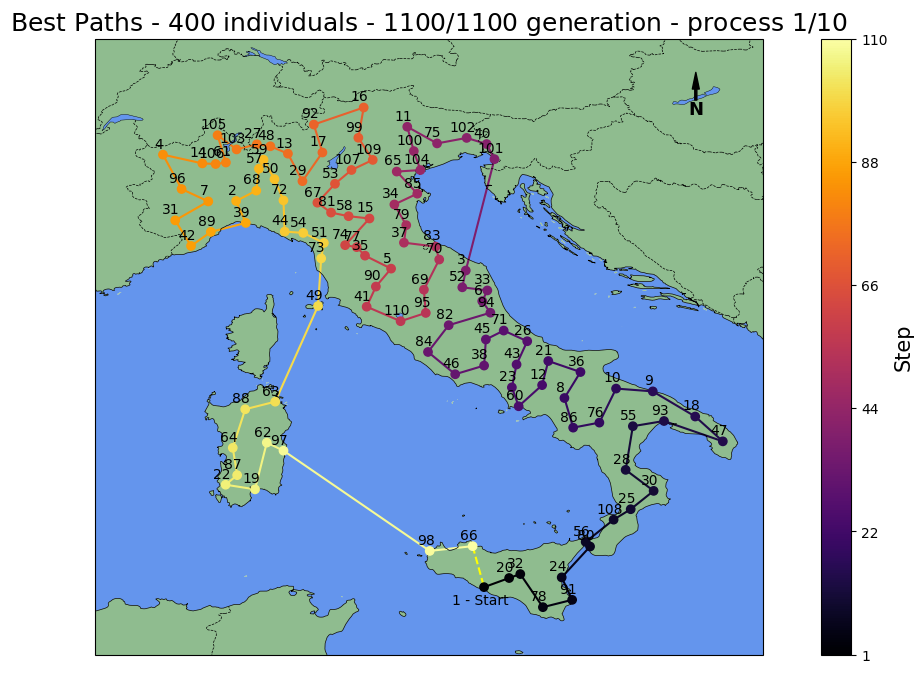

In [114]:
def add_compass(ax, loc_x=0.9, loc_y=0.9, size=13):
    # Posiziona il testo 'N'
    compass_text = ax.text(loc_x, loc_y-0.014, 'N', fontsize=size,weight='bold', ha='center', va='center', transform=ax.transAxes)
    
    # Posiziona la freccia (Nord) sopra la lettera 'N'
    ax.annotate('', xy=(loc_x, loc_y + 0.045), xytext=(loc_x, loc_y),
                xycoords='axes fraction', textcoords='axes fraction',
                arrowprops=dict(facecolor='black', width=1.5, headwidth=5))


fig, axs = plt.subplots(1, 1, figsize=(15,8), subplot_kw={'projection': ccrs.PlateCarree()}, gridspec_kw={'wspace': 0.02})

axs.set_extent([6, 19, 36, 48], crs=ccrs.PlateCarree())
axs.add_feature(cfeature.OCEAN, facecolor='cornflowerblue')
axs.add_feature(cfeature.LAND, facecolor='darkseagreen')
axs.add_feature(cfeature.COASTLINE, lw=0.5)
axs.add_feature(cfeature.BORDERS, linestyle='--', lw=0.5)
axs.add_feature(cfeature.LAKES, edgecolor='black', facecolor='cornflowerblue', linewidth=0.3)

steps = np.arange(len(best_pos_it))
cmap = plt.get_cmap('inferno')
colors = cmap(steps / steps.max())
sc=axs.scatter(best_pos_it[:,1], best_pos_it[:,2], color=colors, zorder=2)

for i, (x, y) in enumerate(zip(best_pos_it[:,1], best_pos_it[:,2])):
    axs.plot( best_pos_it[i:i+2,1], best_pos_it[i:i+2,2], color=colors[i], zorder=1)
    if(i==0):
        axs.annotate(f'{int(best_pos_it[i,0])} - Start', (x, y), color='black',textcoords="offset points", xytext=(-3,-12), ha='center')
    else:
        axs.annotate(f'{int(best_pos_it[i,0])}', (x, y), color='black',textcoords="offset points", xytext=(-3,5), ha='center')

axs.plot( [best_pos_it[len(best_pos_it)-1,1],best_pos_it[0,1]], [best_pos_it[len(best_pos_it)-1,2],best_pos_it[0,2]], color='yellow', linestyle='--',zorder=1)
axs.set_xlabel(r'$x$',fontsize=12)
axs.set_ylabel(r'$y$',fontsize=12)
axs.grid(True)
axs.set_title(r'Best Paths - $400$ individuals - $1100/1100$ generation - process $1/10$',fontsize=18)
add_compass(axs)

sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=1, vmax=steps.max()+1))
sm.set_array([]) 
cbar = fig.colorbar(sm, ax=axs, orientation='vertical')
cbar.set_label('Step', fontsize=15)
ticks = np.linspace(1, steps.max()+1, num=6)
cbar.set_ticks(ticks)
cbar.set_ticklabels([f'{int(tick)}' for tick in ticks]) 

plt.show()

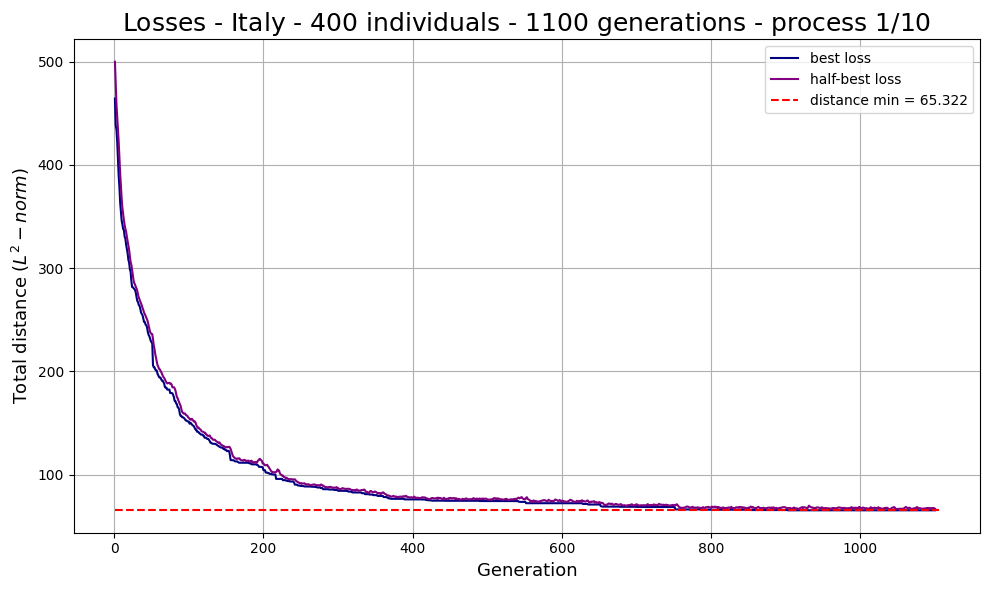

In [90]:
plt.figure(figsize=(10,6))

plt.plot(best_loss_it[:,0],best_loss_it[:,1],color='navy',label=r'best loss')
plt.plot(half_loss_it[:,0],half_loss_it[:,1],color='purple',label=r'half-best loss')
plt.hlines(best_loss_it[-1,1],xmin=best_loss_it[0,0],xmax=(best_loss_it[-1,0]+5),color='r',linestyles='--',label=f'distance min = {round(best_loss_it[-1,1],3)}')
plt.xlabel(r'Generation',fontsize=13)
plt.ylabel(r'Total distance ($L^2-norm$)',fontsize=13)
plt.legend()
plt.grid(True)

plt.title(r'Losses - Italy - $400$ individuals - $1100$ generations - process $1/10$',fontsize=18)
plt.tight_layout()
plt.show()

In [115]:
n_generations_it=1100

def gif_it(gens):
     files=[]
     for i in gens:
        file = 'OUTPUT/IMAGES/best_path_' + str(i) + '.png'
        files.append(file) 
        fig, axs = plt.subplots(1, 1, figsize=(15,8), subplot_kw={'projection': ccrs.PlateCarree()}, gridspec_kw={'wspace': 0.02})
        axs.set_extent([6, 19, 36, 48], crs=ccrs.PlateCarree())
        axs.add_feature(cfeature.OCEAN, facecolor='cornflowerblue')
        axs.add_feature(cfeature.LAND, facecolor='darkseagreen')
        axs.add_feature(cfeature.COASTLINE, lw=0.5)
        axs.add_feature(cfeature.BORDERS, linestyle='--', lw=0.5)
        axs.add_feature(cfeature.LAKES, edgecolor='black', facecolor='cornflowerblue', linewidth=0.3)
        pos_it=np.loadtxt("./OUTPUT/ITALY/PATHS/path_"+str(i+1)+".dat")
        steps = np.arange(len(pos_it))
        cmap = plt.get_cmap('inferno')
        colors = cmap(steps / steps.max())
        sc=axs.scatter(pos_it[:,1], pos_it[:,2], color=colors, zorder=2)
        for j, (x, y) in enumerate(zip(pos_it[:,1], pos_it[:,2])):
            axs.plot( pos_it[j:j+2,1], pos_it[j:j+2,2], color=colors[j], zorder=1)
            if(i==0):
               axs.annotate(f'{int(pos_it[j,0])} - Start', (x, y), color='black',textcoords="offset points", xytext=(-3,-12), ha='center')
            else:
               axs.annotate(f'{int(pos_it[j,0])}', (x, y), color='black',textcoords="offset points", xytext=(-3,5), ha='center')
        axs.plot( [pos_it[len(pos_it)-1,1],pos_it[0,1]], [pos_it[len(pos_it)-1,2],pos_it[0,2]], color='yellow', linestyle='--',zorder=1)
        axs.set_xlabel(r'$x$',fontsize=12)
        axs.set_ylabel(r'$y$',fontsize=12)
        axs.grid(True)
        axs.set_title(f'Best Paths - 400 individuals - Generation {str(i+1)}/{n_generations_it} - Process 1/10', fontsize=20)
        add_compass(axs)
        
        sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=1, vmax=steps.max()+1))
        sm.set_array([])
        cbar = fig.colorbar(sm, ax=axs, orientation='vertical')
        cbar.set_label('Step', fontsize=15)
        ticks = np.linspace(1, steps.max()+1, num=6)
        cbar.set_ticks(ticks)
        cbar.set_ticklabels([f'{int(tick)}' for tick in ticks])
        fig.savefig(file)
        plt.close()
    
     images = [Image.open(file) for file in files]
     out_path = './OUTPUT/best_path_it.gif'
     images[0].save(out_path, save_all=True, append_images=images[1:], optimize=False, duration=100, loop=0)
     for image in images :
        image.close()
     for file in files :
         os.remove(file)


gens = np.arange(n_generations_it)
gif_it(gens)

In [118]:
out_path_it = './OUTPUT/best_path_it.gif'
HTML(f"<img src='{out_path_it}' style='width: 10000px;'/>")